In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [2]:
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
df1 = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [4]:
df1.shape

(5268, 13)

In [5]:
df1.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
3225,06/15/1980,11:06,"Lihue, Hawaii",Aero PaLease - Air Taxi,NaN,"Honolulu, HI - Lihue, HI",Piper PA-34,N2564Q,NaN,2.0,2.0,0.0,Missed approach and crashed in fog and rain. ...
3242,09/05/1980,NaN,"Near Montelimar, France",Military - Kuwait Air Force,NaN,NaN,Lockheed L-100-20 Hercules,KAF317,4350,8.0,8.0,0.0,Crashed after being struck by lightning
974,12/05/1948,NaN,"Kiangwan, China",Central Air Transport,NaN,NaN,Curtiss C-46,XT-538,NaN,40.0,9.0,0.0,"Overshot runway, crashed and burned."
3992,02/13/1991,17:41,"Aspen, Colorado",Air Taxi - Richmor Aviation,NaN,"Las Vegas, NV - Aspen, CO",Learjet35A,N535PC,291,3.0,3.0,0.0,During an unstabilized approach in snow covere...
1314,03/19/1954,22:30,"Near Lothian, Maryland",Military - U.S. Air Force,NaN,"Oklahoma - Long Island, NY",Fairchild C-110F,51-7993,10732,18.0,18.0,0.0,Crashed to the ground about 20 minutes after l...


In [19]:
df1['hour'] = df1['Time'].astype(str).str[0:2]

In [21]:
df1.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,hour
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",17
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,06
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,na


In [ ]:
# sadece saat kisminin cekilmesi

In [28]:
df2 = df1[['hour', 'Time']]

In [29]:
df2.apply(pd.to_numeric, errors='ignore')

,hour,Time
0,17,17:18
1,06,06:30
2,na,NaN
3,18,18:30
4,10,10:30
...,...,...
5263,06,06:30
5264,na,NaN
5265,00,00:15
5266,08,08:30


In [31]:
df2.dropna(inplace = True)

C:\Users\Alp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df2.head(3)

,hour,Time
0,17,17:18
1,06,06:30
3,18,18:30


In [34]:
df2.shape

(3049, 2)

In [54]:
df2.hour.value_counts()

09    183
19    181
11    172
15    171
10    167
14    166
12    166
13    157
16    156
17    155
20    154
18    147
08    140
07    132
23    111
21    108
22    106
06     85
02     77
04     65
01     64
00     63
05     60
03     49
Name: hour, dtype: int64

In [53]:
df2.drop(df2[df2['hour'] == '8:'].index, inplace = True) 

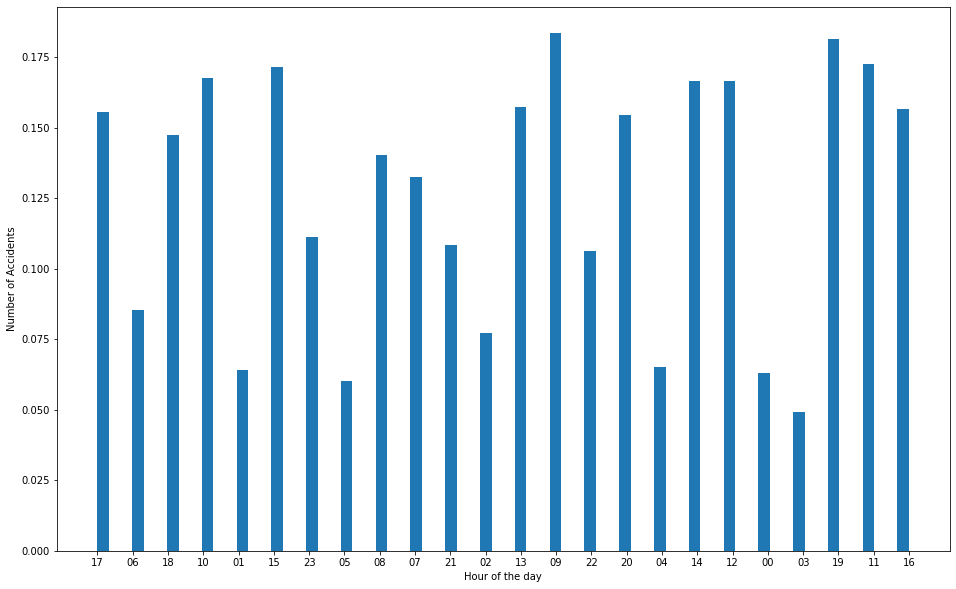

In [58]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(16,10))
plt.hist(df2.hour, density=True, bins=70)  # `density=False` would make counts
plt.ylabel('Number of Accidents')
plt.xlabel('Hour of the day');

In [6]:
df1.Time.value_counts()

15:00    32
12:00    31
11:00    29
16:00    26
19:30    26
         ..
18:57     1
07:23     1
21:32     1
05:50     1
07:17     1
Name: Time, Length: 1005, dtype: int64

In [59]:
df1.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
hour               0
dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [12]:
df = df1[['Summary', 'Date']]

In [13]:
df.shape

(5268, 2)

In [14]:
df = df[df['Summary'].notnull()]

In [15]:
df.shape

(4878, 2)

In [16]:
df.head()

,Summary,Date
0,"During a demonstration flight, a U.S. Army fly...",09/17/1908
1,First U.S. dirigible Akron exploded just offsh...,07/12/1912
2,The first fatal airplane accident in Canada oc...,08/06/1913
3,The airship flew into a thunderstorm and encou...,09/09/1913
4,Hydrogen gas which was being vented was sucked...,10/17/1913


In [17]:
rare_words = pd.Series(' '.join(df['Summary']).split()).value_counts()[-100:]

In [18]:
rare_words

execssive       1
last-minute     1
downdraughts    1
command,        1
northbound      1
               ..
Paloma          1
inspector's     1
hangers.        1
Denpassar,      1
essential       1
Length: 100, dtype: int64

In [20]:
# az kullanilan, listenin sonundaki kelimeleri drop edebiliriz - outlier gibi 

In [21]:
rare_words = pd.Series(' '.join(df['Summary']).split()).value_counts()[-100:]
df['Summary'] = df['Summary'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

In [23]:
df.sample(5)

,Summary,Date
4640,The aircraft developed engine trouble shortly ...,07/04/1999
4795,The sightseeing helicopter crashed and burned ...,08/10/2001
4345,After the cargo flight encountered problems en...,06/27/1995
1736,The aircraft crashed into the jungle approxima...,09/17/1961
4730,The cargo plane lost an engine on takeoff lost...,07/20/2000


In [24]:
# **Word Tokenization and lowercase**
df["Summary"]=df["Summary"].apply(lambda x: word_tokenize(x.lower()))
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["Summary"]=df["Summary"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('english')
df["Summary"]=df["Summary"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["Summary"]=df["Summary"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["Summary"]=df["Summary"].apply(lambda x: " ".join(x))

In [25]:
df.Summary

0       demonstration flight army flyer flown orville ...
1       first dirigible akron exploded offshore altitu...
2       first fatal airplane accident canada occurred ...
3       airship flew thunderstorm encountered severe d...
4       hydrogen gas vented sucked forward engine igni...
                              ...                        
5263    approach military transport crashed house skid...
5264                 cargo plane crashed approach airport
5265    airbus went missing atlantiocean flight rio de...
5266    air ambulance crashed hill attempting land hea...
5267    military transport went missing en route might...
Name: Summary, Length: 4878, dtype: object

In [31]:
df.iloc[4877]

Summary    military transport went missing en route might...
Date                                              06/08/2009
Name: 5267, dtype: object

In [32]:
df.head()

,Summary,Date
0,demonstration flight army flyer flown orville ...,09/17/1908
1,first dirigible akron exploded offshore altitu...,07/12/1912
2,first fatal airplane accident canada occurred ...,08/06/1913
3,airship flew thunderstorm encountered severe d...,09/09/1913
4,hydrogen gas vented sucked forward engine igni...,10/17/1913


**Vectorization**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [34]:
X_train=df["Summary"]

In [35]:
vectorizer = CountVectorizer()

In [36]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [37]:
vectorizer.get_feature_names()[:5]

['aad', 'aaliyah', 'ababa', 'abandon', 'abandoned']

In [38]:
len(vectorizer.get_feature_names())

8044

In [39]:
X_train_count = vectorizer.transform(X_train)

In [40]:
count=pd.DataFrame(X_train_count.toarray(), columns=vectorizer.get_feature_names())

In [41]:
pd.set_option('display.max_columns', 50)

In [42]:
count.head()

,aad,aaliyah,ababa,abandon,abandoned,abandoning,abandonment,abatement,abbas,abbreviation,abejorral,abide,abidjan,ability,abingdon,abkhazi,abkhazian,ablaze,able,abnormal,abnormality,abnormally,aboard,aboout,abort,...,yorker,young,youngblood,youngest,yousef,yt,yuan,yunque,yuri,zambia,zambian,zant,zaragoza,zarate,zealand,zero,zia,zimathan,zimbabwe,zlaté,zone,zue,zulia,zuma,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
count.shape

(4878, 8044)

**TF/IDF**

In [44]:
tf_idf_vectorizer=TfidfVectorizer()

In [45]:
tf_idf_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [46]:
X_train_tf_idf = tf_idf_vectorizer.transform(X_train)

In [47]:
tf_idf = pd.DataFrame(X_train_tf_idf.toarray(), columns=tf_idf_vectorizer.get_feature_names())

In [48]:
tf_idf.head()

,aad,aaliyah,ababa,abandon,abandoned,abandoning,abandonment,abatement,abbas,abbreviation,abejorral,abide,abidjan,ability,abingdon,abkhazi,abkhazian,ablaze,able,abnormal,abnormality,abnormally,aboard,aboout,abort,...,yorker,young,youngblood,youngest,yousef,yt,yuan,yunque,yuri,zambia,zambian,zant,zaragoza,zarate,zealand,zero,zia,zimathan,zimbabwe,zlaté,zone,zue,zulia,zuma,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
tf_idf.sum()

aad          0.347965
aaliyah      0.249603
ababa        0.258400
abandon      1.163478
abandoned    2.267784
               ...   
zone         1.102357
zue          0.233519
zulia        0.297218
zuma         0.543480
zurich       1.003491
Length: 8044, dtype: float64

In [50]:
tf_idf.sum().sort_values(ascending=False)

crashed       332.230951
plane         200.980162
aircraft      195.833263
mountain      158.796651
engine        142.540860
                 ...    
vessel          0.074665
protecting      0.074665
challenge       0.074665
tracker         0.074665
addressed       0.074665
Length: 8044, dtype: float64

In [51]:
count.sum().sort_values(ascending=False)

crashed      3214
aircraft     2468
plane        1912
pilot        1335
engine       1097
             ... 
probems         1
proceded        1
fruit           1
proceding       1
aad             1
Length: 8044, dtype: int64

In [52]:
type(count.sum())

pandas.core.series.Series

**Word Cloud**

In [53]:
import matplotlib.pyplot as plt

In [54]:
from wordcloud import WordCloud

In [56]:
wordcloud = WordCloud(background_color = 'white', max_words = 500)

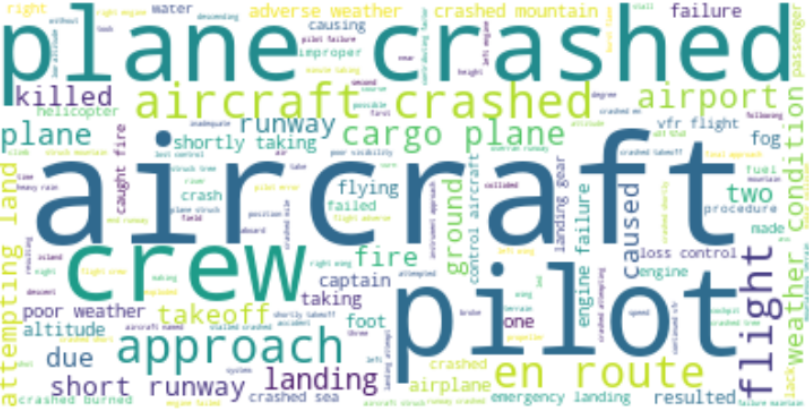

In [57]:
count_w = " ".join(df.Summary)

In [58]:
wordcloud.generate(count_w)

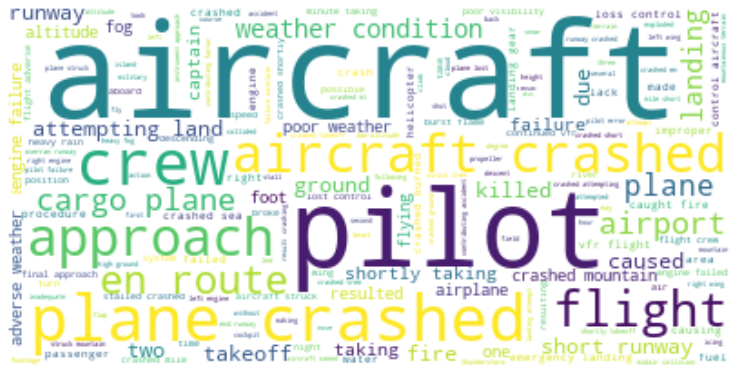

In [59]:
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation = 'bilinear')  
plt.axis('off')
plt.show();

In [ ]:
# certain_words = ['aircraft', 'plane', 'crashed'] ciktigi zaman daha mantikli bir wordcloud olustu

In [60]:
certain_words = ['aircraft', 'plane', 'crashed']

In [61]:
count_w = count_w.replace('aircraft', '') #in order to remove a word from the string, I replace it with an empty space 

In [62]:
count_w = count_w.replace('plane', '')

In [63]:
count_w = count_w.replace('crashed', '')

In [64]:
str1 = "Hello"
str2 = "World"
newstr = " ".join((str1, str2))

In [65]:
len(count_w)

618800

In [107]:
len(count_w)

652529

In [109]:
len(count_w)

642034

In [111]:
len(count_w)

619536

In [ ]:
1. Airbus - Boeing kazalarindaki summary'lerden olusturulacak DF'lerin regression analizi - Boeing / Airbus tahmini

In [ ]:
2. Ucak tiplerinden wordcloud olusturmak

In [ ]:
3. Ucak sirketlerinden wordcloud olusturmak

In [ ]:
4. 